# Context

https://www.kaggle.com/andrewmvd/fetal-health-classification

https://www.kaggle.com/avibagul80/fetal-health-classification-98-6

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.



# Content

- This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

    - Normal
    - Suspect
    - Pathological

VARIABLES

- baseline value: Baseline Fetal Heart Rate (FHR)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of LDs per second
- severe_decelerations: Number of SDs per second
- prolongued_decelerations: Number of PDs per second
- abnormal_short_term_variability: Percentage of time with abnormal short term variability
- mean_value_of_short_term_variability: Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability: Mean value of long term variability
- histogram_width: Width of the histogram made using all values from a record
- histogram_min: Histogram minimum value
- histogram_max: Histogram maximum value
- histogram_number_of_peaks: Number of peaks in the exam histogram
- histogram_number_of_zeroes: Number of zeroes in the exam histogram
- histogram_mode: Hist mode
- histogram_mean: Hist mean
- histogram_median: Hist Median
- histogram_variance: Hist variance
- histogram_tendency: Histogram trend
- fetal_health: Fetal health: 1 - Normal 2 - Suspect 3 - Pathological (Target variable)

# Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
import sys
sys.path.insert(0, '/Users/dpagniez/Desktop/Functions')

from functions_plot_EDA import *
from My_functions_EDA import *
from fx_MLClassification import *

In [3]:
data = pd.read_csv('../Datasets/fetal_health.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# EDA & Data Cleaning

In [5]:
data.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>,
        <AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
      

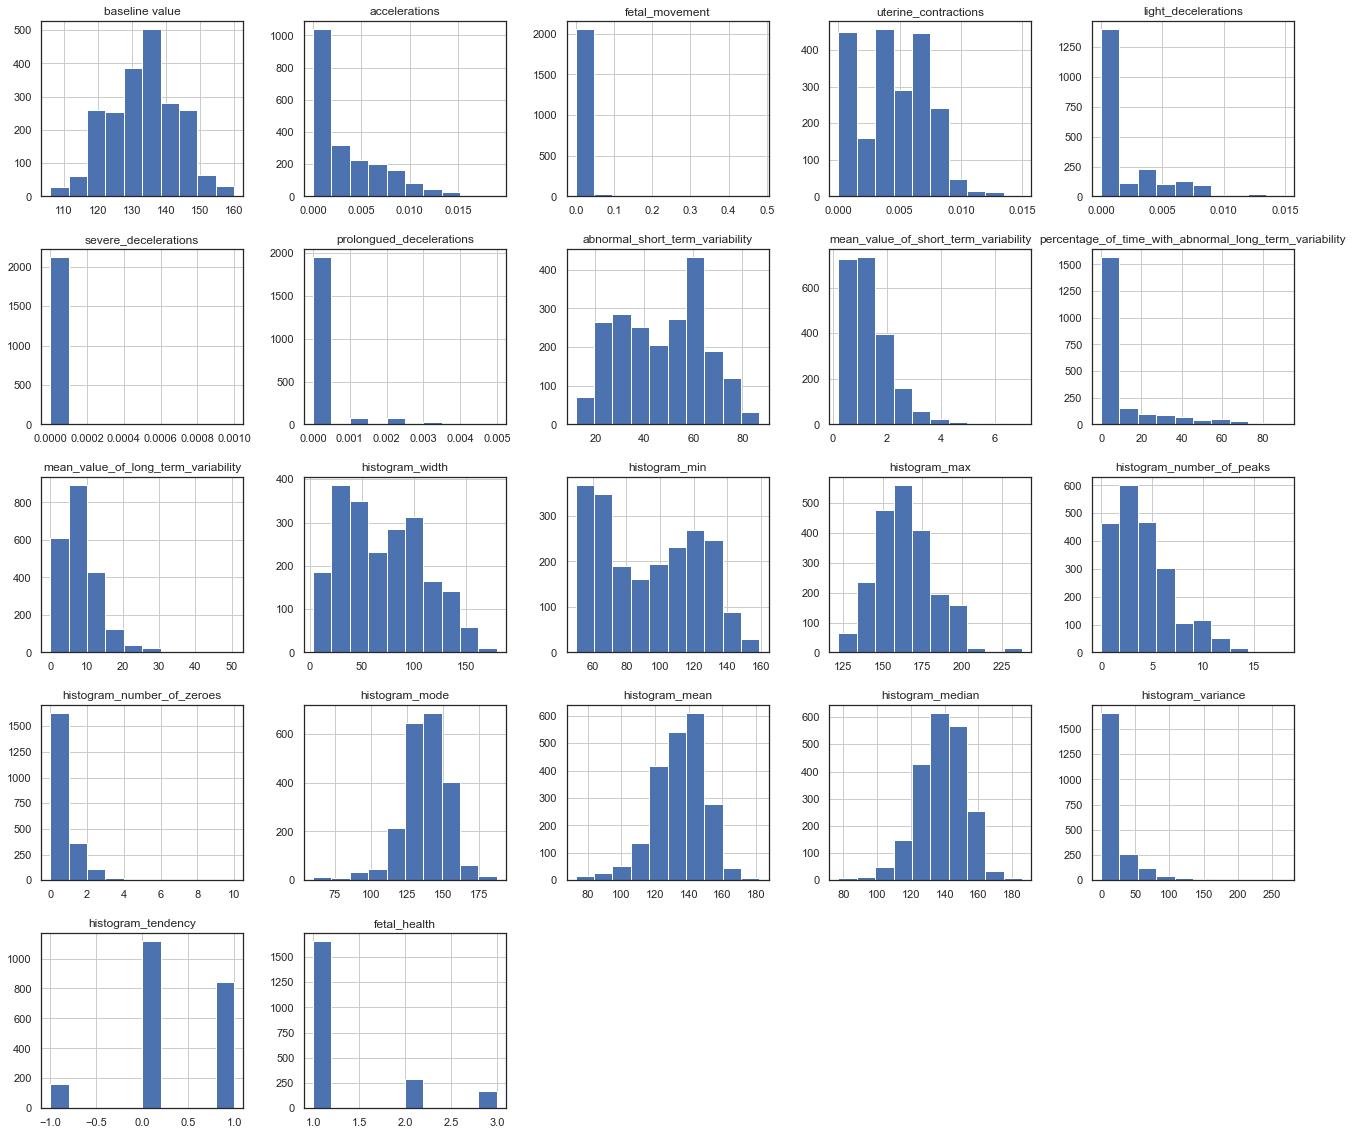

In [6]:
data.hist(edgecolor='white', figsize=(20, 20))

Basic information from your dataset
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability         

baseline value  \
baseline value                                            1.000000   
accelerations                                             0.080560   
fetal_movement                                            0.033436   
uterine_contractions                                      0.146373   
light_decelerations                                       0.159032   
severe_decelerations                                      0.053518   
prolongued_decelerations                                  0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                      0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                       0.032091   
histogram_width                                           0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                 0.113933   
histogram_number_of_zeroes                                0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                        0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.148151   

                                                    accelerations  \
baseline value                                           0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                      0.108615   
severe_decelerations                                     0.043018   
prolongued_decelerations                                 0.127749   
abnormal_short_term_variability                          0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...       0.373943   
mean_value_of_long_term_variability                      0.142363   
histogram_width                                          0.298631   
histogram_min                                            0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                               0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                             0.364066   

                                                    fetal_movement  \
baseline value                                            0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                      0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                      0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                           0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...        0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

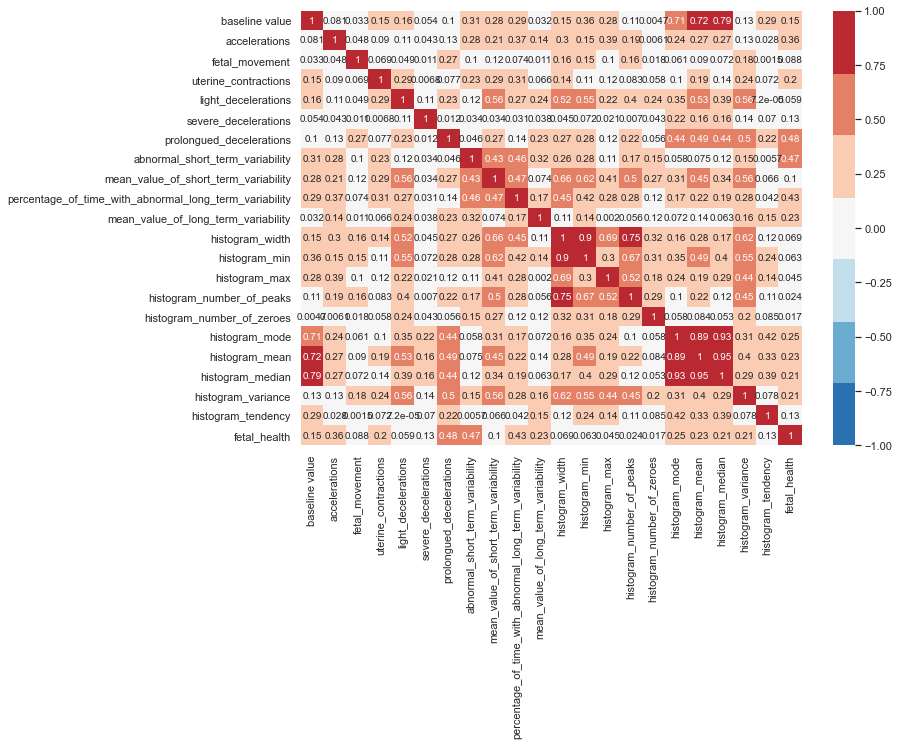

In [7]:
corrCoef_Threshold(data, False)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
for item in range(0,len(data.columns)):
    OutLiersBox(data, data.columns[item])
    print('--------------------------------------------------------')

--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


- due to all the samples are real values, we decide do the firs model without drop outliers 
- due to the high amount of variables, we will use PCA before to build the model 

In [10]:
data.duplicated().sum()

13

In [11]:
data.drop_duplicates()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [12]:
df = data.copy()

### baseline value

In [13]:
plotHist(df,'baseline value')

In [14]:
df['baseline value'] = np.log(df['baseline value'])

- due the range of values in other variables, we decide do log transformation in theose variablesables with biggest ranges as a part of the data preparation

### accelerations:

In [15]:
data.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [16]:
plotHist(data,'accelerations')

- Due to accelerations variable is low correlated with the target variable we keep it. 

In [17]:
#df = df.drop('accelerations',axis=1)
#df.info()

In [18]:
df.duplicated().sum()

13

In [19]:
df = df.drop_duplicates()

### fetal_movement

In [20]:
df.fetal_movement.value_counts()

0.000    1302
0.001     164
0.002     112
0.003      87
0.004      48
         ... 
0.481       1
0.425       1
0.360       1
0.115       1
0.063       1
Name: fetal_movement, Length: 102, dtype: int64

In [21]:
plotHist(df,'fetal_movement')

- Due to FETAL_MOVEMENT variable is not correlated with any other variable and the low spread of the values we drop it 

In [22]:
df = df.drop('fetal_movement',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   uterine_contractions                                    2113 non-null   float64
 3   light_decelerations                                     2113 non-null   float64
 4   severe_decelerations                                    2113 non-null   float64
 5   prolongued_decelerations                                2113 non-null   float64
 6   abnormal_short_term_variability                         2113 non-null   float64
 7   mean_value_of_short_term_variability                    2113 non-null   float64
 8   percentage_of_time_with_abnormal_long_

### uterine_contractions

In [23]:
df.uterine_contractions.value_counts()

0.000    323
0.005    290
0.004    242
0.006    231
0.007    216
0.003    211
0.008    160
0.002    159
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.014      2
0.013      2
0.015      1
Name: uterine_contractions, dtype: int64

In [24]:
d1 = df[df.uterine_contractions>=0.010]
d1.head(50)

baseline value  accelerations  uterine_contractions  \
5           4.897840          0.001                 0.010   
6           4.897840          0.001                 0.013   
51          5.049856          0.000                 0.012   
52          5.049856          0.000                 0.011   
134         5.068904          0.002                 0.010   
136         5.068904          0.002                 0.010   
259         4.844187          0.004                 0.013   
280         4.787492          0.005                 0.010   
281         4.770685          0.005                 0.010   
561         4.852030          0.001                 0.010   
562         4.852030          0.000                 0.010   
563         4.852030          0.002                 0.012   
564         4.852030          0.002                 0.011   
1077        4.897840          0.002                 0.010   
1133        4.804021          0.000                 0.011   
1135        4.804021          0.003                 0.011   
1160        4.844187          0.011                 0.010   
1163        4.875197          0.011                 0.011   
1164        4.875197          0.011                 0.015   
1170        4.836282          0.000                 0.010   
1179        4.836282          0.006                 0.010   
1182        4.836282          0.005                 0.010   
1184        4.787492          0.000                 0.012   
1185        4.787492          0.000                 0.012   
1292        4.744932          0.004                 0.010   
1298        4.736198          0.007                 0.010   
1299        4.736198          0.011                 0.011   
1338        4.852030          0.000                 0.010   
1375        4.795791          0.007                 0.010   
1389        4.795791          0.007                 0.010   
1449        4.990433          0.013                 0.010   
1478        5.003946          0.010                 0.010   
1479        5.003946          0.009                 0.011   
1485        4.882802          0.013                 0.010   
1487        4.882802          0.013                 0.011   
1492        4.882802          0.000                 0.011   
1493        4.882802          0.000                 0.010   
1494        4.882802          0.007                 0.010   
1496        4.882802          0.006                 0.010   
1497        4.882802          0.009                 0.011   
1500        4.882802          0.010                 0.010   
1501        4.882802          0.008                 0.010   
1567        4.867534          0.009                 0.011   
1568        4.867534          0.012                 0.012   
1571        4.882802          0.008                 0.012   
1580        4.882802          0.000                 0.010   
1592        4.897840          0.000                 0.010   
1631        4.867534          0.004                 0.011   
1649        4.882802          0.007                 0.010   
1651        4.882802          0.007                 0.010   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
5                   0.009                   0.0                     0.002   
6                   0.008                   0.0                     0.003   
51                  0.008                   0.0                     0.000   
52                  0.008                   0.0                     0.001   
134                 0.000                   0.0                     0.000   
136                 0.000                   0.0                     0.000   
259                 0.004                   0.0                     0.000   
280                 0.000                   0.0                     0.000   
281                 0.003                   0.0                     0.000   
561                 0.003                   0.0                     0.000   
562                 0.005                   0.0

- Due to uterine_contractions variable is low correlated with fetal health (target), we leave it just in case. 

In [25]:
#df = df.drop('uterine_contractions',axis=1)
#df.info()

### light_decelerations:

In [26]:
df.light_decelerations.value_counts()

0.000    1218
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: light_decelerations, dtype: int64

In [27]:
d1 = df[df.light_decelerations>0.005]
d1.head(50)

baseline value  accelerations  uterine_contractions  light_decelerations  \
5          4.897840          0.001                 0.010                0.009   
6          4.897840          0.001                 0.013                0.008   
28         4.882802          0.000                 0.001                0.008   
29         4.882802          0.000                 0.000                0.012   
30         4.882802          0.000                 0.002                0.010   
31         4.882802          0.000                 0.004                0.014   
32         4.882802          0.000                 0.001                0.010   
45         4.804021          0.000                 0.003                0.006   
48         4.804021          0.003                 0.006                0.006   
51         5.049856          0.000                 0.012                0.008   
52         5.049856          0.000                 0.011                0.008   
106        4.828314          0.000                 0.000                0.008   
110        4.828314          0.007                 0.002                0.007   
114        4.859812          0.007                 0.009                0.012   
115        4.859812          0.000                 0.007                0.015   
118        4.812184          0.001                 0.004                0.006   
122        4.812184          0.000                 0.005                0.006   
182        4.875197          0.000                 0.000                0.008   
183        4.882802          0.000                 0.006                0.008   
185        4.882802          0.004                 0.008                0.006   
257        4.844187          0.007                 0.005                0.007   
434        5.017280          0.000                 0.006                0.006   
436        5.017280          0.000                 0.006                0.006   
439        5.017280          0.000                 0.006                0.006   
554        4.941642          0.000                 0.008                0.006   
560        4.867534          0.000                 0.000                0.007   
568        4.852030          0.008                 0.008                0.006   
570        4.852030          0.001                 0.007                0.006   
575        4.852030          0.000                 0.008                0.007   
661        4.852030          0.000                 0.006                0.014   
743        4.955827          0.001                 0.005                0.011   
744        4.955827          0.000                 0.003                0.014   
745        4.955827          0.001                 0.005                0.012   
746        4.955827          0.001                 0.005                0.009   
747        4.955827          0.001                 0.007                0.011   
803        4.983607          0.000                 0.005                0.008   
835        4.852030          0.006                 0.002                0.010   
836        4.852030          0.004                 0.002                0.007   
910        4.983607          0.002                 0.000                0.008   
956        4.912655          0.000                 0.008                0.007   
957        4.912655          0.000                 0.008                0.008   
959        4.890349          0.000                 0.008                0.008   
960        4.890349          0.000                 0.006                0.009   
962        4.890349          0.001                 0.002                0.008   
963        4.890349          0.000                 0.001                0.008   
971        4.875197          0.000                 0.006                0.009   
972        4.875197          0.000                 0.008                0.009   
973        4.875197          0.000                 0.005                0.008   
974        4.875197          0.000  

- Due the slow variance on the variancealues and that is not correlated with fetal health we drop the variable. 

In [28]:
df = df.drop('light_decelerations',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   uterine_contractions                                    2113 non-null   float64
 3   severe_decelerations                                    2113 non-null   float64
 4   prolongued_decelerations                                2113 non-null   float64
 5   abnormal_short_term_variability                         2113 non-null   float64
 6   mean_value_of_short_term_variability                    2113 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2113 non-null   float64
 8   mean_value_of_long_term_variability   

### severe_decelerations

In [29]:
df.severe_decelerations.value_counts()

0.000    2106
0.001       7
Name: severe_decelerations, dtype: int64

In [30]:
d1 = df[df.severe_decelerations>0]
d1.head(10)

baseline value  accelerations  uterine_contractions  \
1488        4.882802          0.002                 0.008   
1489        4.882802          0.000                 0.006   
1791        4.795791          0.000                 0.004   
1792        4.795791          0.000                 0.003   
1793        4.795791          0.000                 0.005   
1794        4.795791          0.000                 0.003   
1795        4.795791          0.000                 0.004   

      severe_decelerations  prolongued_decelerations  \
1488                 0.001                     0.001   
1489                 0.001                     0.001   
1791                 0.001                     0.000   
1792                 0.001                     0.000   
1793                 0.001                     0.000   
1794                 0.001                     0.000   
1795                 0.001                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1488                             31.0                                   1.4   
1489                             32.0                                   1.3   
1791                             66.0                                   2.1   
1792                             67.0                                   2.1   
1793                             66.0                                   2.1   
1794                             68.0                                   2.1   
1795                             70.0                                   1.9   

      percentage_of_time_with_abnormal_long_term_variability  \
1488                                                0.0        
1489                                                0.0        
1791                                                0.0        
1792                                                0.0        
1793                                                0.0        
1794                                                0.0        
1795                                                0.0        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
1488                                 11.5            102.0           61.0   
1489                                 13.6             91.0           60.0   
1791                                  6.4            105.0           55.0   
1792                                  0.0            102.0           55.0   
1793                                  0.0            102.0           55.0   
1794                                  0.0            102.0           55.0   
1795                                  0.0            102.0           55.0   

      histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
1488          163.0                        5.0                         0.0   
1489          151.0                        1.0                         1.0   
1791          160.0                        7.0                         0.0   
1792          157.0                        4.0                         1.0   
1793          157.0                        5.0                         1.0   
1794          157.0                        3.0                         1.0   
1795          157.0                        6.0                         2.0   

      histogram_mode  histogram_mean  histogram_median  histogram_variance  \
1488            99.0           121.0             129.0                94.0   
1489            99.0           116.0             125.0                72.0   
1791            67.0            85.0              92.0               109.0   
1792            67.0            81.0              87.0                89.0   
1793            67.0            83.0              90.0                98.0   
1794            67.0            79.0              82.0                83.0   
1795            67.0            76.0              79.0                68.0   

      histogram_tendency  fetal_health  
1488          

- even considering that the data in this variable is really unbalanced, because almost all the values =! 0 are correlated with fetal pathologies we keep the variableble

### prolongued_decelerations

In [31]:
df.prolongued_decelerations.value_counts()

0.000    1935
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: prolongued_decelerations, dtype: int64

In [32]:
d1 = df[df.prolongued_decelerations!=0]
d1.head(30)

baseline value  accelerations  uterine_contractions  \
5          4.897840          0.001                 0.010   
6          4.897840          0.001                 0.013   
14         4.867534          0.006                 0.004   
15         4.867534          0.006                 0.004   
17         4.875197          0.002                 0.003   
18         4.867534          0.003                 0.006   
19         4.867534          0.005                 0.005   
20         4.859812          0.000                 0.004   
21         4.852030          0.005                 0.003   
22         4.852030          0.000                 0.003   
28         4.882802          0.000                 0.001   
52         5.049856          0.000                 0.011   
116        4.812184          0.000                 0.007   
124        4.812184          0.000                 0.007   
661        4.852030          0.000                 0.006   
662        4.927254          0.000                 0.005   
663        4.927254          0.000                 0.005   
664        4.927254          0.000                 0.003   
665        4.927254          0.000                 0.005   
668        4.927254          0.000                 0.006   
682        4.882802          0.000                 0.004   
683        4.882802          0.000                 0.002   
689        4.890349          0.004                 0.004   
690        4.890349          0.000                 0.004   
693        4.890349          0.004                 0.005   
695        4.890349          0.003                 0.006   
697        4.875197          0.001                 0.003   
698        4.875197          0.000                 0.003   
699        4.867534          0.001                 0.004   
700        4.867534          0.000                 0.003   

     severe_decelerations  prolongued_decelerations  \
5                     0.0                     0.002   
6                     0.0                     0.003   
14                    0.0                     0.001   
15                    0.0                     0.001   
17                    0.0                     0.002   
18                    0.0                     0.001   
19                    0.0                     0.001   
20                    0.0                     0.003   
21                    0.0                     0.002   
22                    0.0                     0.003   
28                    0.0                     0.001   
52                    0.0                     0.001   
116                   0.0                     0.002   
124                   0.0                     0.002   
661                   0.0                     0.003   
662                   0.0                     0.002   
663                   0.0                     0.003   
664                   0.0                     0.002   
665                   0.0                     0.002   
668                   0.0                     0.002   
682                   0.0                     0.004   
683                   0.0                     0.004   
689                   0.0                     0.001   
690                   0.0                     0.002   
693                   0.0                     0.001   
695                   0.0                     0.001   
697                   0.0                     0.002   
698                   0.0                     0.002   
699                   0.0                     0.001   
700                   0.0                     0.003   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
5                               26.0                                   5.9   
6                               29.0                                   6.3   
14                              21.0                                   2.3   
15                              19.0                                   2.3   
17                              18.0            

- even considering that the data in the variable prolongued decelerations is really unbalanced, because almost all the values =! 0 are correlated with fetal pathologies we keep the variableble

### abnormal_short_term_variability

In [33]:
df.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    59
64.0    58
63.0    58
        ..
14.0     4
83.0     4
82.0     2
12.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

In [34]:
plotHist(df,'abnormal_short_term_variability')

In [35]:
df['abnormal_short_term_variability'] = np.log(df['abnormal_short_term_variability'])

In [36]:
df['abnormal_short_term_variability'].value_counts()

4.094345    62
4.060443    61
4.174387    59
4.158883    58
4.143135    58
            ..
2.708050     4
4.418841     4
2.484907     2
4.406719     2
4.465908     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

- due the range of values in other variables, we decide do log transformation in those variables with biggest ranges as a part of the data preparation

### mean_value_of_short_term_variability

In [37]:
df.mean_value_of_short_term_variability.value_counts()

0.8    122
1.3    121
0.5    120
0.4    118
0.7    117
0.6    113
0.9    112
1.2    106
1.5    100
1.0     99
1.1     97
1.4     95
0.3     84
1.7     78
1.6     76
1.9     59
1.8     51
2.2     47
0.2     46
2.1     44
2.0     38
2.3     27
2.4     27
2.5     26
2.7     25
2.8     22
2.6     21
3.0     16
3.2     13
2.9     13
3.4     12
3.1     10
3.3      7
3.8      6
3.6      4
4.1      3
4.2      3
4.9      3
3.5      3
3.7      3
4.4      2
4.5      2
4.3      2
5.4      2
3.9      2
6.3      2
4.0      2
4.8      2
5.0      2
6.0      1
7.0      1
5.7      1
4.7      1
5.3      1
6.9      1
5.2      1
5.9      1
Name: mean_value_of_short_term_variability, dtype: int64

In [38]:
plotHist(df,'mean_value_of_short_term_variability')

In [39]:
d1 = df[df.mean_value_of_short_term_variability>=4]
d1.head(40)

baseline value  accelerations  uterine_contractions  \
5           4.897840          0.001                 0.010   
6           4.897840          0.001                 0.013   
28          4.882802          0.000                 0.001   
29          4.882802          0.000                 0.000   
30          4.882802          0.000                 0.002   
31          4.882802          0.000                 0.004   
44          4.804021          0.000                 0.003   
45          4.804021          0.000                 0.003   
46          4.804021          0.000                 0.008   
47          4.804021          0.002                 0.006   
48          4.804021          0.003                 0.006   
51          5.049856          0.000                 0.012   
52          5.049856          0.000                 0.011   
114         4.859812          0.007                 0.009   
115         4.859812          0.000                 0.007   
116         4.812184          0.000                 0.007   
181         4.927254          0.017                 0.005   
184         4.882802          0.013                 0.003   
551         4.912655          0.010                 0.006   
552         4.912655          0.016                 0.004   
553         4.941642          0.003                 0.008   
554         4.941642          0.000                 0.008   
555         4.941642          0.006                 0.008   
573         4.852030          0.009                 0.007   
574         4.852030          0.013                 0.003   
661         4.852030          0.000                 0.006   
744         4.955827          0.000                 0.003   
1603        4.927254          0.005                 0.002   
1620        4.955827          0.002                 0.001   
2023        4.859812          0.000                 0.005   
2048        4.852030          0.000                 0.008   
2049        4.828314          0.005                 0.007   
2051        4.844187          0.003                 0.005   

      severe_decelerations  prolongued_decelerations  \
5                      0.0                     0.002   
6                      0.0                     0.003   
28                     0.0                     0.001   
29                     0.0                     0.000   
30                     0.0                     0.000   
31                     0.0                     0.000   
44                     0.0                     0.000   
45                     0.0                     0.000   
46                     0.0                     0.000   
47                     0.0                     0.000   
48                     0.0                     0.000   
51                     0.0                     0.000   
52                     0.0                     0.001   
114                    0.0                     0.000   
115                    0.0                     0.000   
116                    0.0                     0.002   
181                    0.0                     0.000   
184                    0.0                     0.000   
551                    0.0                     0.000   
552                    0.0                     0.000   
553                    0.0                     0.000   
554                    0.0                     0.000   
555                    0.0                     0.000   
573                    0.0                     0.000   
574                    0.0                     0.000   
661                    0.0                     0.003   
744                    0.0                     0.000   
1603                   0.0                     0.000   
1620                   0.0                     0.000   
2023                   0.0                     0.000   
2048                   0.0                     0.000   
2049                   0.0                     0.000   
2051                   0.0                     0.000   

      abnormal_short_term_

- due is not correlated with the target variable, we drop it

In [40]:
df = df.drop('mean_value_of_short_term_variability',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   uterine_contractions                                    2113 non-null   float64
 3   severe_decelerations                                    2113 non-null   float64
 4   prolongued_decelerations                                2113 non-null   float64
 5   abnormal_short_term_variability                         2113 non-null   float64
 6   percentage_of_time_with_abnormal_long_term_variability  2113 non-null   float64
 7   mean_value_of_long_term_variability                     2113 non-null   float64
 8   histogram_width                       

### percentage_of_time_with_abnormal_long_term_variability

In [41]:
df.percentage_of_time_with_abnormal_long_term_variability.value_counts()

0.0     1235
1.0       52
2.0       44
5.0       43
4.0       39
        ... 
86.0       1
88.0       1
63.0       1
79.0       1
82.0       1
Name: percentage_of_time_with_abnormal_long_term_variability, Length: 87, dtype: int64

In [42]:
plotHist(df,'percentage_of_time_with_abnormal_long_term_variability')

- due to is not possible do the log of 0, we leave this variable as it is 

### mean_value_of_long_term_variability

In [43]:
df.mean_value_of_long_term_variability.value_counts()

0.0     137
6.7      29
7.1      29
6.5      25
5.2      25
       ... 
19.1      1
16.5      1
28.0      1
27.0      1
28.4      1
Name: mean_value_of_long_term_variability, Length: 249, dtype: int64

In [44]:
plotHist(df,'mean_value_of_long_term_variability')

- due is not correlated with our Target variable, and the other variablebles (less short term variability 0.31) we decide to drop the variable 

### histogram variables 

- Due to the no correlation between the histogram variables and the target. And that all of them were created based on all the values of the record we will drop some of them, keeping kust the correlated ones. As simpler as better :)

In [45]:
df = df.drop('histogram_width', axis=1)
df = df.drop('histogram_min',axis=1)
df = df.drop('histogram_max',axis=1)
df = df.drop('histogram_number_of_peaks',axis=1)
df = df.drop('histogram_number_of_zeroes',axis=1)
df = df.drop('histogram_tendency',axis=1)       

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   uterine_contractions                                    2113 non-null   float64
 3   severe_decelerations                                    2113 non-null   float64
 4   prolongued_decelerations                                2113 non-null   float64
 5   abnormal_short_term_variability                         2113 non-null   float64
 6   percentage_of_time_with_abnormal_long_term_variability  2113 non-null   float64
 7   mean_value_of_long_term_variability                     2113 non-null   float64
 8   histogram_mode                        

### histogram_mode

In [47]:
plotHist(df,'histogram_mode')

In [48]:
df.histogram_mode.unique()

array([120., 141., 137.,  76.,  71., 122., 150., 135., 143., 134., 133.,
       129.,  75., 126., 128., 124., 123., 121., 125., 119., 117., 127.,
       116., 170., 151., 154., 149., 147., 140., 142., 153., 162., 156.,
       144., 146., 152., 148., 145., 167., 165., 161., 131., 132., 136.,
       139., 114., 163., 159., 138., 158., 157., 186., 187., 180., 176.,
       115., 160.,  90., 108.,  97., 130., 155., 107., 112., 109., 110.,
       169.,  99.,  86., 106., 113., 111.,  98.,  95.,  91.,  88., 164.,
        89., 179., 105.,  67.,  60., 100.,  93.,  77., 103., 104.,  69.])

In [49]:
df.histogram_mode = np.log(df.histogram_mode)
df.histogram_mode

0       4.787492
1       4.948760
2       4.948760
3       4.919981
4       4.919981
          ...   
2121    5.030438
2122    5.023881
2123    5.030438
2124    5.023881
2125    4.976734
Name: histogram_mode, Length: 2113, dtype: float64

### histogram_mean

In [50]:
plotHist(df,'histogram_mean')

In [51]:
df.histogram_mean.unique()

array([137., 136., 135., 134., 107., 122., 148., 125., 127., 128., 124.,
       129., 104.,  99., 126., 123., 119., 113., 120., 112., 116., 115.,
       117., 118., 168., 171., 142., 131., 152., 155., 153., 154., 145.,
       140., 143., 156., 158., 157., 147., 150., 164., 163., 151., 149.,
       130., 132., 114., 105., 162., 165., 169., 172., 167., 161., 146.,
       121., 133., 160., 141., 144., 139., 138., 159., 166., 178., 180.,
       182., 175., 173.,  98.,  90.,  87., 106., 110., 109., 108., 111.,
        91., 103., 101.,  83.,  84.,  78.,  85.,  82., 100., 170., 102.,
        97.,  92.,  93.,  95.,  81.,  79.,  76.,  89.,  88.,  75.,  94.,
        96.,  86.,  80.,  73.])

In [52]:
df.histogram_mean = np.log(df.histogram_mean)
df.histogram_mean

0       4.919981
1       4.912655
2       4.905275
3       4.897840
4       4.912655
          ...   
2121    5.010635
2122    4.997212
2123    4.997212
2124    4.990433
2125    4.962845
Name: histogram_mean, Length: 2113, dtype: float64

### histogram_median

In [53]:
plotHist(df,'histogram_median')

In [54]:
df.histogram_median.unique()

array([121., 140., 138., 137., 107., 106., 123., 151., 141., 135., 133.,
       132., 129., 120., 102., 125., 127., 117., 126., 115., 130., 118.,
       119., 124., 170., 172., 152., 136., 154., 150., 156., 155., 147.,
       144., 159., 160., 153., 149., 158., 166., 165., 148., 145., 157.,
       128., 134., 113., 164., 174., 168., 162., 163., 139., 122., 161.,
       131., 143., 146., 142., 169., 180., 183., 186., 178., 171., 176.,
       177., 116.,  91., 167.,  78.,  77., 112., 114., 111., 110.,  86.,
        79., 108., 105., 109.,  95.,  94.,  97., 101.,  98.,  93.,  99.,
       100.,  92.,  87.,  90.,  82., 103., 104.])

In [55]:
df.histogram_median = np.log(df.histogram_median)
df.histogram_median

0       4.795791
1       4.941642
2       4.927254
3       4.919981
4       4.927254
          ...   
2121    5.023881
2122    5.017280
2123    5.023881
2124    5.017280
2125    4.976734
Name: histogram_median, Length: 2113, dtype: float64

### histogram_variance

In [56]:
plotHist(df,'histogram_variance')

- we cant log scale because it have 0, and we dont want to keep it becausee the big difference in. the ranges considering the other variables, as we already saved the mean, median and mode of the histogram. We decide to drop it

In [57]:
df = df.drop('histogram_variance',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   uterine_contractions                                    2113 non-null   float64
 3   severe_decelerations                                    2113 non-null   float64
 4   prolongued_decelerations                                2113 non-null   float64
 5   abnormal_short_term_variability                         2113 non-null   float64
 6   percentage_of_time_with_abnormal_long_term_variability  2113 non-null   float64
 7   mean_value_of_long_term_variability                     2113 non-null   float64
 8   histogram_mode                        

### Fetal health

In [58]:
df.fetal_health.value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

- we can clearly see that the data is unbalanced. Lets continue with the dataset as this, because in real life the biggest part of the fetos doesn't have pathologies. If our models don't work, we will do some oversampling of the values 2 (suspicious), and 3 (abnormal).

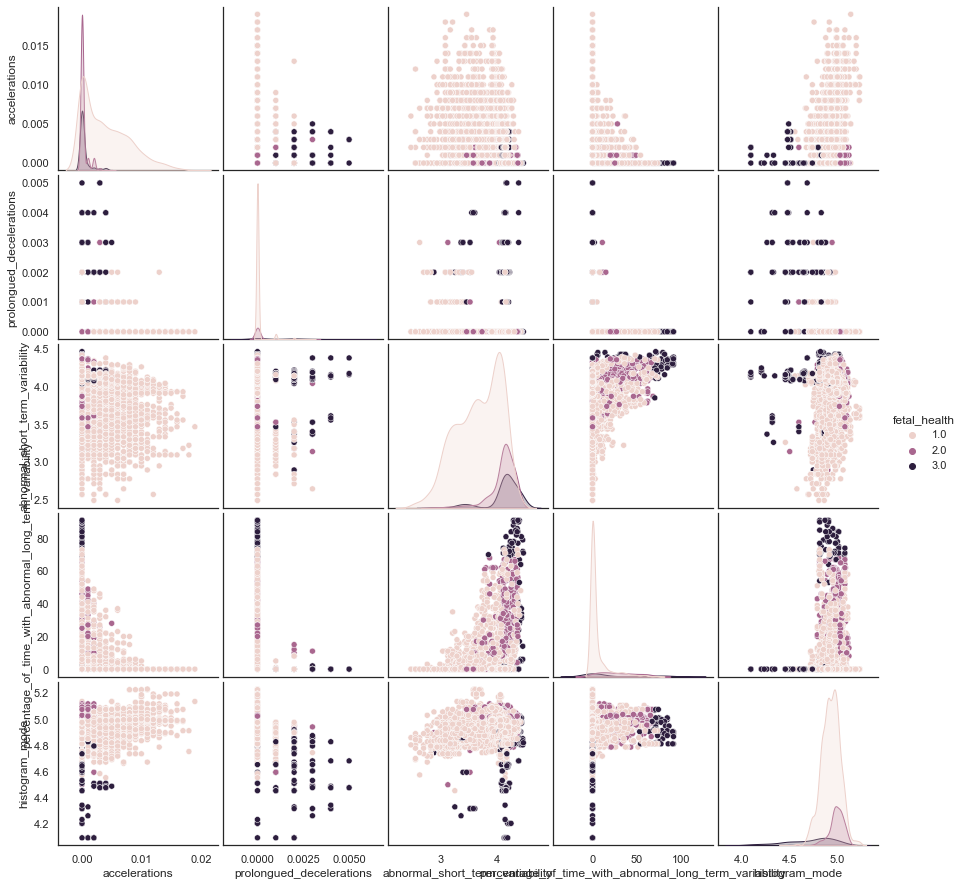

In [59]:
sns.pairplot(df, hue='fetal_health', vars=['accelerations','prolongued_decelerations','abnormal_short_term_variability',
                                          'percentage_of_time_with_abnormal_long_term_variability','histogram_mode'])

# ML Classification (Unbalanced Target)

### PCA

- remove the target variable, scale the data, find the best number of PCA to build the model 

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#se puede probar otros scaled methods 

In [61]:
X = df.drop(['fetal_health'],axis=1)

In [62]:
y = df['fetal_health']

In [63]:
scaler = StandardScaler()
X_sc = scaler.fit(X) 

In [64]:
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [65]:
# Let's build the PCA model
pca = PCA(n_components=9)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled) 

In [66]:
print('\nShape of original_data:', X.shape)
print('Shape of X_pca:', X_pca.shape)

expl = pca.explained_variance_ratio_
print('\nExplained variance of each PC:', np.around(expl,2))
print('Cumulative explained variance:',round(sum(expl[0:5]),2))


Shape of original_data: (2113, 11)
Shape of X_pca: (2113, 9)

Explained variance of each PC: [0.36 0.18 0.11 0.09 0.08 0.07 0.05 0.03 0.02]
Cumulative explained variance: 0.82


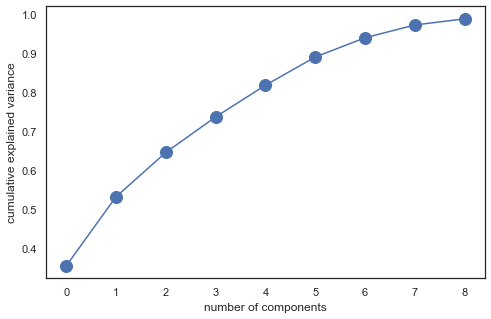

In [67]:
# Plot the acumulated explained variance in the new dimensions
fig,ax = plt.subplots(figsize=(7,5))
plt.style.use('seaborn-white')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- we decide to keep the first 6 PCA due the 7th, 8th and 9th does not explain to much. So we will do a new DF, and we will keep PC1 to 6. 

In [68]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9'])

In [69]:
X_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.886553  2.525669  0.492566  0.225464 -1.844426 -1.034258  0.032441   
1     0.005487 -2.191504  0.241097 -0.034640  0.114988  0.022561  1.289770   
2     0.205440 -2.220728  0.812321 -0.336992  1.053264 -0.207285  1.299539   
3     0.239236 -2.614560  2.042671 -0.468786  1.395308  0.239324  0.841336   
4     0.160514 -2.986196  1.193971 -0.188761  0.783700  0.122714  0.907774   
...        ...       ...       ...       ...       ...       ...       ...   
2108 -1.766326  1.171800 -0.293914 -0.180618  1.202952 -0.796756 -0.525621   
2109 -1.654580  0.981494 -0.436352 -0.124644  1.101616 -0.726452 -0.604270   
2110 -1.683811  0.977877 -0.593850 -0.107963  1.089054 -0.728295 -0.631570   
2111 -1.713761  1.228611 -0.312823 -0.093874  0.823844 -0.665535 -0.458443   
2112 -1.317606  1.329046 -0.763622 -0.100881  1.096475 -1.203376 -0.080638   

           PC8       PC9  
0     0.181924 -0.317407  
1    -0.148563  0.217746  
2    -0.173639  0.157436  
3     0.628520  0.439565  
4     0.928891  0.509442  
...        ...       ...  
2108  0.265585 -0.431827  
2109  0.288452 -0.342088  
2110  0.148533 -0.392969  
2111  0.337411 -0.327745  
2112  0.681799  0.128511  

[2113 rows x 9 columns]

In [70]:
X_pca = X_pca.drop('PC7',axis=1)
X_pca = X_pca.drop('PC8',axis=1)
X_pca = X_pca.drop('PC9',axis=1)

In [71]:
X_pca

PC1       PC2       PC3       PC4       PC5       PC6
0     0.886553  2.525669  0.492566  0.225464 -1.844426 -1.034258
1     0.005487 -2.191504  0.241097 -0.034640  0.114988  0.022561
2     0.205440 -2.220728  0.812321 -0.336992  1.053264 -0.207285
3     0.239236 -2.614560  2.042671 -0.468786  1.395308  0.239324
4     0.160514 -2.986196  1.193971 -0.188761  0.783700  0.122714
...        ...       ...       ...       ...       ...       ...
2108 -1.766326  1.171800 -0.293914 -0.180618  1.202952 -0.796756
2109 -1.654580  0.981494 -0.436352 -0.124644  1.101616 -0.726452
2110 -1.683811  0.977877 -0.593850 -0.107963  1.089054 -0.728295
2111 -1.713761  1.228611 -0.312823 -0.093874  0.823844 -0.665535
2112 -1.317606  1.329046 -0.763622 -0.100881  1.096475 -1.203376

[2113 rows x 6 columns]

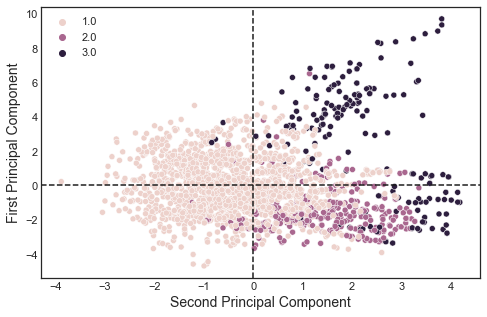

In [72]:
# We have already calculated the PC's, let's plot them in a 2D plot

fig,ax = plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

sns.scatterplot(data=X_pca, x="PC2", y="PC1", hue=df['fetal_health'].values)
plt.legend(['normal', 'suspicious','abnormal'])

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel("Second Principal Component",fontsize=14)
plt.ylabel("First Principal Component",fontsize=14)
plt.legend()
plt.show()

- It seems like there are not much explanation here, so lets build the same models with and withthout the PCA to compare

## SVM-C X_pca

In [73]:
X_pca.head(2)

PC1       PC2       PC3       PC4       PC5       PC6
0  0.886553  2.525669  0.492566  0.225464 -1.844426 -1.034258
1  0.005487 -2.191504  0.241097 -0.034640  0.114988  0.022561

In [74]:
# Step 1. Define target and non-target variables
X = X_pca
y = df['fetal_health']

In [75]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

In [76]:
# Step 3. Instantiate the model
from sklearn.svm import SVC
svc_ = SVC()

In [77]:
# Step 4. Fit the model
svc_.fit(X_train,y_train)

SVC()

In [78]:
AllmetricsC(svc_, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1095   42    3]
 [  71  137    4]
 [  12   21   94]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[488  18   0]
 [ 28  50   2]
 [  5   7  36]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.936660  0.964427  0.950341    506.0
2.0   0.666667  0.625000  0.645161     80.0
3.0   0.947368  0.750000  0.837209     48.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.888445   0.837484  0.759595  0.789763
test   0.905363   0.850232  0.779809  0.810904


Accuracy  Precision    Recall        f1
Train  0.888445   0.837484  0.759595  0.789763
test   0.905363   0.850232  0.779809  0.810904

### lets try to tune it 

In [79]:
# If you want you can execute, I dont because my computer is too slow 

In [80]:
# Step 1. Define the param_grid 

#param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
 #             'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
  #            'kernel': ['rbf', 'poly', 'linear']} 

In [81]:
# Step 2. GridSearch and fit the model

#grid = GridSearchCV(SVC(), param_grid, cv=10)
#grid.fit(X_train, y_train)

In [82]:
#best_params = grid.best_params_

In [83]:
#svm_clf = SVC(**best_params)
#svm_clf.fit(X_train, y_train)

In [84]:
#AllmetricsC(svm_clf, X_train, y_train, X_test, y_test)

## SVM-C actual X 

In [85]:
X.head(2)

PC1       PC2       PC3       PC4       PC5       PC6
0  0.886553  2.525669  0.492566  0.225464 -1.844426 -1.034258
1  0.005487 -2.191504  0.241097 -0.034640  0.114988  0.022561

In [86]:
# Step 1. Define target and non-target variables
X = df.drop(['fetal_health'],axis=1)
y = df['fetal_health']

In [87]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
# Step 3. Instantiate the model
from sklearn.svm import SVC
svmc_ = SVC()

In [89]:
# Step 4. Fit the model
svmc_.fit(X_train,y_train)

SVC()

In [90]:
AllmetricsC(svmc_, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1101   35    4]
 [ 140   72    0]
 [  94    3   30]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[492  14   0]
 [ 50  30   0]
 [ 34   2  12]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.854167  0.972332  0.909427    506.0
2.0   0.652174  0.375000  0.476190     80.0
3.0   1.000000  0.250000  0.400000     48.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.809349   0.772462  0.506250  0.554433
test   0.842271   0.835447  0.532444  0.595206


Accuracy  Precision    Recall        f1
Train  0.809349   0.772462  0.506250  0.554433
test   0.842271   0.835447  0.532444  0.595206

At the moment, the SVM-C works better with PCA, but is not too good.
So we will try with Random Forest Cassifier and KNN. If with those algorithms we dont improve our metrics. We willl continue doing some undersampling/oversampling, because our target is not balanced, and doing one iteration of all our models with our balanced data :) 

## Random forest X_pca

In [91]:
# Step 1. Define target and non-target variables
X = X_pca
y = df['fetal_health']

In [92]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_pred_RF = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       506
         2.0       0.65      0.61      0.63        80
         3.0       0.91      0.83      0.87        48

    accuracy                           0.90       634
   macro avg       0.83      0.80      0.82       634
weighted avg       0.90      0.90      0.90       634



In [95]:
AllmetricsC(rand_forest,X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1140    0    0]
 [   0  212    0]
 [   0    0  127]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[483  22   1]
 [ 28  49   3]
 [  4   4  40]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.937864  0.954545  0.946131    506.0
2.0   0.653333  0.612500  0.632258     80.0
3.0   0.909091  0.833333  0.869565     48.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.908053   0.868086  0.792390  0.822580
test   0.902208   0.833429  0.800126  0.815985


Accuracy  Precision    Recall        f1
Train  0.908053   0.868086  0.792390  0.822580
test   0.902208   0.833429  0.800126  0.815985

- it seems overfited! lets try with the actual X without PCA

## Random forest acutal X

In [96]:
# Step 1. Define target and non-target variables
X = df.drop(['fetal_health'],axis=1)
y = df['fetal_health']

In [97]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [98]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
y_pred_RF = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       506
         2.0       0.84      0.79      0.81        80
         3.0       0.96      0.92      0.94        48

    accuracy                           0.95       634
   macro avg       0.92      0.89      0.91       634
weighted avg       0.95      0.95      0.95       634



In [100]:
AllmetricsC(rand_forest,X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1140    0    0]
 [   0  212    0]
 [   0    0  127]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[495  10   1]
 [ 16  63   1]
 [  2   2  44]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.964912  0.978261  0.971541    506.0
2.0   0.840000  0.787500  0.812903     80.0
3.0   0.956522  0.916667  0.936170     48.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.937116   0.911537  0.866082  0.885414
test   0.949527   0.920478  0.894143  0.906871


Accuracy  Precision    Recall        f1
Train  0.937116   0.911537  0.866082  0.885414
test   0.949527   0.920478  0.894143  0.906871

### hypertune params

In [101]:
param_grid = {'max_depth':[10, 12, 14], 
              'n_estimators':[1500, 1400, 1300],
              'min_samples_split':[3,4,5]}

rand_frst_clf = RandomForestClassifier(random_state=0)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="f1", 
                                n_jobs=-1, cv=3)

In [102]:
%%time
grid_rand_forest.fit(X_train, y_train)

CPU times: user 6.78 s, sys: 261 ms, total: 7.04 s
Wall time: 4min 42s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [1500, 1400, 1300]},
             scoring='f1')

In [103]:
grid_rand_forest.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=1500,
                       random_state=0)

In [104]:
rand_forest = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       n_estimators=1500, random_state=0)

rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       n_estimators=1500, random_state=0)

In [105]:
y_pred_beRF = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       506
         2.0       0.84      0.79      0.81        80
         3.0       0.96      0.92      0.94        48

    accuracy                           0.95       634
   macro avg       0.92      0.89      0.91       634
weighted avg       0.95      0.95      0.95       634



In [106]:
AllmetricsC(rand_forest, X_train, y_train,X_test,y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1138    2    0]
 [   8  204    0]
 [   0    2  125]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[496   9   1]
 [ 16  63   1]
 [  2   2  44]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.964981  0.980237  0.972549    506.0
2.0   0.851351  0.787500  0.818182     80.0
3.0   0.956522  0.916667  0.936170     48.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.940499   0.920322  0.866249  0.887940
test   0.951104   0.924285  0.894801  0.908967


Accuracy  Precision    Recall        f1
Train  0.940499   0.920322  0.866249  0.887940
test   0.951104   0.924285  0.894801  0.908967

- Random forest classifier works better with the actual X than the  X PCA. But lets try with KNN

## KNN X_pca

In [107]:
# Step 1. Define target and non-target variables
X = X_pca
y = df['fetal_health']

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=1/3,random_state=0,stratify=y)

In [109]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [110]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [111]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 90.2127659574468 % and k = [14]


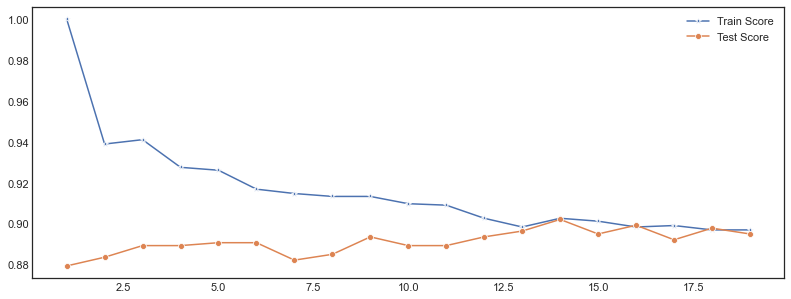

In [112]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

- The best result is captured at k = 14 hence 14 is used for the final model

In [113]:
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.902127659574468

In [114]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  1.0  2.0  3.0  All
True                         
1.0        539    9    1  549
2.0         41   55    2   98
3.0          9    7   42   58
All        589   71   45  705

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       549
         2.0       0.77      0.56      0.65        98
         3.0       0.93      0.72      0.82        58

    accuracy                           0.90       705
   macro avg       0.87      0.76      0.80       705
weighted avg       0.90      0.90      0.90       705



In [116]:
AllmetricsC(knn, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1079   14    4]
 [  82  105    7]
 [  14   16   87]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[539   9   1]
 [ 41  55   2]
 [  9   7  42]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.915110  0.981785  0.947276    549.0
2.0   0.774648  0.561224  0.650888     98.0
3.0   0.933333  0.724138  0.815534     58.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.887057   0.831719  0.739023  0.773470
test   0.902128   0.874364  0.755716  0.804566


Accuracy  Precision    Recall        f1
Train  0.887057   0.831719  0.739023  0.773470
test   0.902128   0.874364  0.755716  0.804566

In [117]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8566053802113094
Best Parameters: {'n_neighbors': 46}


## KNN actual X 

In [118]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["fetal_health"],axis = 1),),
        columns=['baseline value', 'accelerations', 'uterine_contractions',
       'severe_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_mode',
       'histogram_mean', 'histogram_median'])

In [119]:
y = df.fetal_health

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0,stratify=y)

In [121]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [122]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [123]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 90.63829787234042 % and k = [1, 5]


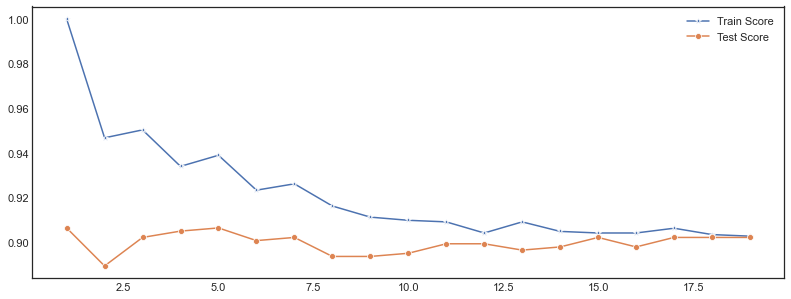

In [124]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

- The best result is captured at k = 5 hence 5 is used for the final model

In [125]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.9063829787234042

In [126]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn1.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  1.0  2.0  3.0  All
True                         
1.0        529   17    3  549
2.0         31   60    7   98
3.0          5    3   50   58
All        565   80   60  705

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       549
         2.0       0.75      0.61      0.67        98
         3.0       0.83      0.86      0.85        58

    accuracy                           0.91       705
   macro avg       0.84      0.81      0.82       705
weighted avg       0.90      0.91      0.90       705



In [128]:
AllmetricsC(knn1, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1097    0    0]
 [   0  194    0]
 [   0    0  117]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[529  17   3]
 [ 31  60   7]
 [  5   3  50]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.936283  0.963570  0.949731    549.0
2.0   0.750000  0.612245  0.674157     98.0
3.0   0.833333  0.862069  0.847458     58.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.901277   0.837362  0.809658  0.818521
test   0.906383   0.839872  0.812628  0.823782


Accuracy  Precision    Recall        f1
Train  0.901277   0.837362  0.809658  0.818521
test   0.906383   0.839872  0.812628  0.823782

In [129]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn1 = KNeighborsClassifier()
knn_cv1= GridSearchCV(knn,param_grid,cv=5)
knn_cv1.fit(X,y)

print("Best Score:" + str(knn_cv1.best_score_))
print("Best Parameters: " + str(knn_cv1.best_params_))

Best Score:0.8570714709869696
Best Parameters: {'n_neighbors': 40}


# ML Classification (SMOTE over-sampling)

 - As our data is unbalanced respec to the target. We will balance our data and iterate all the models.

In [131]:
# Lets shuffle the data before creating the subsamples, then define target and no target variable 

df_balanced = df.sample(frac=1)

X = df_balanced.drop('fetal_health', axis= 1)
y= df_balanced.fetal_health

In [132]:
from imblearn.over_sampling import SMOTE

# by default: k= 5
smote = SMOTE(random_state=7)
X_sm, y_sm = smote.fit_resample(X, y)

In [133]:
print('\nBefore OVER-sampling\n', y.value_counts())
print('\nAfter OVER-sampling\n', y_sm.value_counts())


Before OVER-sampling
 1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

After OVER-sampling
 1.0    1646
2.0    1646
3.0    1646
Name: fetal_health, dtype: int64


In [135]:
X_sm.shape

(4938, 11)

In [136]:
X.shape

(2113, 11)

### PCA

- remove the target variable, scale the data, find the best number of PCA to build the model 

In [138]:
X = X_sm
y = y_sm

In [139]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#se puede probar otros scaled methods 

In [140]:
scaler = StandardScaler()
X_sc = scaler.fit(X) 

In [141]:
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [142]:
# Let's build the PCA model
pca = PCA(n_components=9)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled) 

In [143]:
print('\nShape of original_data:', X.shape)
print('Shape of X_pca:', X_pca.shape)

expl = pca.explained_variance_ratio_
print('\nExplained variance of each PC:', np.around(expl,2))
print('Cumulative explained variance:',round(sum(expl[0:5]),2))


Shape of original_data: (4938, 11)
Shape of X_pca: (4938, 9)

Explained variance of each PC: [0.4  0.19 0.1  0.08 0.08 0.06 0.04 0.02 0.02]
Cumulative explained variance: 0.85


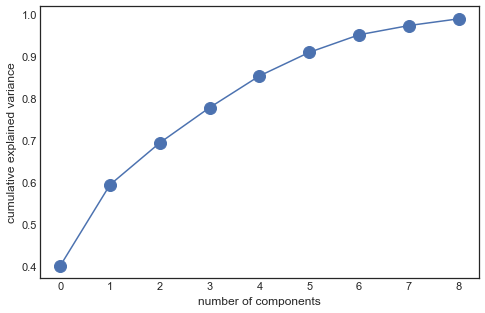

In [144]:
# Plot the acumulated explained variance in the new dimensions
fig,ax = plt.subplots(figsize=(7,5))
plt.style.use('seaborn-white')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- we decide to keep the first 6 PCA due the 7th, 8th and 9th does not explain to much. So we will do a new DF, and we will keep PC1 to 6. 

In [145]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9'])

In [146]:
X_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.219202  1.986898 -1.065990  1.616142 -0.112135 -0.444080  1.142566   
1    -0.463017  1.133813 -0.374604  1.353061 -1.096992  0.515315 -0.632976   
2    -1.809269  1.408287 -0.489271  0.587607  0.281416  0.244538  1.164396   
3    -0.791868  0.394839  0.634233 -0.913673  0.423642 -0.915800 -0.948786   
4    -1.196141  0.100483  0.086682 -0.492683  0.942437  0.126351 -0.753042   
...        ...       ...       ...       ...       ...       ...       ...   
4933  4.421617  0.353705 -1.044842 -0.261531  0.730700  0.121805  1.649419   
4934  2.752435 -0.434806 -0.478128 -1.032336  0.698822  0.687611 -0.287508   
4935 -2.844226 -1.276598 -0.219363  0.273429 -0.120137  0.224073  1.602605   
4936  3.355138 -0.337828  0.472799 -1.107153 -0.126721 -0.101087 -0.811364   
4937  2.974019 -0.657316 -0.855052 -0.765409  0.740809  0.822486 -0.063952   

           PC8       PC9  
0    -0.015642  0.289724  
1    -0.461729 -0.147985  
2    -0.106261  0.085641  
3     0.556138 -0.492458  
4    -0.255592  0.140863  
...        ...       ...  
4933  0.381571  1.419323  
4934  0.554331 -0.408766  
4935  0.053680  0.174843  
4936  0.488169  0.550384  
4937  0.482671 -0.330279  

[4938 rows x 9 columns]

In [147]:
X_pca = X_pca.drop('PC7',axis=1)
X_pca = X_pca.drop('PC8',axis=1)
X_pca = X_pca.drop('PC9',axis=1)

In [148]:
X_pca

PC1       PC2       PC3       PC4       PC5       PC6
0    -0.219202  1.986898 -1.065990  1.616142 -0.112135 -0.444080
1    -0.463017  1.133813 -0.374604  1.353061 -1.096992  0.515315
2    -1.809269  1.408287 -0.489271  0.587607  0.281416  0.244538
3    -0.791868  0.394839  0.634233 -0.913673  0.423642 -0.915800
4    -1.196141  0.100483  0.086682 -0.492683  0.942437  0.126351
...        ...       ...       ...       ...       ...       ...
4933  4.421617  0.353705 -1.044842 -0.261531  0.730700  0.121805
4934  2.752435 -0.434806 -0.478128 -1.032336  0.698822  0.687611
4935 -2.844226 -1.276598 -0.219363  0.273429 -0.120137  0.224073
4936  3.355138 -0.337828  0.472799 -1.107153 -0.126721 -0.101087
4937  2.974019 -0.657316 -0.855052 -0.765409  0.740809  0.822486

[4938 rows x 6 columns]

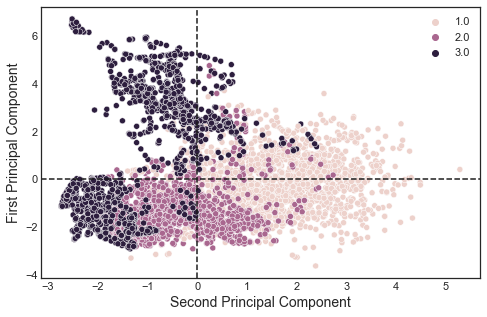

In [158]:
# We have already calculated the PC's, let's plot them in a 2D plot

fig,ax = plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

sns.scatterplot(data=X_pca, x="PC2", y="PC1", hue=y_sm.values)
plt.legend(['normal', 'suspicious','abnormal'])

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel("Second Principal Component",fontsize=14)
plt.ylabel("First Principal Component",fontsize=14)
plt.legend()
plt.show()

- It seems like there are not much explanation here, so lets build the same models with and withthout the PCA to compare

## SVM-C X_pca

In [159]:
X_pca.head(2)

PC1       PC2       PC3       PC4       PC5       PC6
0 -0.219202  1.986898 -1.065990  1.616142 -0.112135 -0.444080
1 -0.463017  1.133813 -0.374604  1.353061 -1.096992  0.515315

In [163]:
# Step 1. Define target and non-target variables
X = X_pca
y = y_sm

In [164]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_sm, test_size=0.3, random_state=0)

In [165]:
# Step 3. Instantiate the model
from sklearn.svm import SVC
svc_ = SVC()

In [166]:
# Step 4. Fit the model
svc_.fit(X_train,y_train)

SVC()

In [167]:
AllmetricsC(svc_, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1002  140   15]
 [  40 1071   52]
 [   5  138  993]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[414  71   4]
 [ 24 444  15]
 [  5  59 446]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.934537  0.846626  0.888412    489.0
2.0   0.773519  0.919255  0.840114    483.0
3.0   0.959140  0.874510  0.914872    510.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision   Recall        f1
Train  0.879061   0.889701  0.87887  0.880727
test   0.879892   0.889065  0.88013  0.881132


Accuracy  Precision   Recall        f1
Train  0.879061   0.889701  0.87887  0.880727
test   0.879892   0.889065  0.88013  0.881132

### lets try to tune it 

In [79]:
# If you want you can execute, I dont because my computer is too slow 

In [80]:
# Step 1. Define the param_grid 

#param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
 #             'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
  #            'kernel': ['rbf', 'poly', 'linear']} 

In [81]:
# Step 2. GridSearch and fit the model

#grid = GridSearchCV(SVC(), param_grid, cv=10)
#grid.fit(X_train, y_train)

In [82]:
#best_params = grid.best_params_

In [83]:
#svm_clf = SVC(**best_params)
#svm_clf.fit(X_train, y_train)

In [84]:
#AllmetricsC(svm_clf, X_train, y_train, X_test, y_test)

## SVM-C actual X 

In [168]:
X_sm.head(2)

baseline value  accelerations  uterine_contractions  severe_decelerations  \
0        4.927254          0.007                 0.007                   0.0   
1        4.867534          0.007                 0.002                   0.0   

   prolongued_decelerations  abnormal_short_term_variability  \
0                       0.0                         3.332205   
1                       0.0                         3.951244   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               16.0        
1                                                0.0        

   mean_value_of_long_term_variability  histogram_mode  histogram_mean  \
0                                  1.6        4.962845        4.912655   
1                                  4.2        4.969813        4.927254   

   histogram_median  
0          4.948760  
1          4.962845

In [169]:
# Step 1. Define target and non-target variables
X = X_sm
y = y_sm

In [170]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [171]:
# Step 3. Instantiate the model
from sklearn.svm import SVC
svmc_ = SVC()

In [172]:
# Step 4. Fit the model
svmc_.fit(X_train,y_train)

SVC()

In [173]:
AllmetricsC(svmc_, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[773 231 153]
 [167 969  27]
 [247 124 765]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[323 102  64]
 [ 70 403  10]
 [101  48 361]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.653846  0.660532  0.657172    489.0
2.0   0.728752  0.834369  0.777992    483.0
3.0   0.829885  0.707843  0.764021    510.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.723672   0.729764  0.723199  0.722759
test   0.733468   0.737494  0.734248  0.733062


Accuracy  Precision    Recall        f1
Train  0.723672   0.729764  0.723199  0.722759
test   0.733468   0.737494  0.734248  0.733062

At the moment, the SVM-C works better with PCA, but is not too good.
So we will try with Random Forest Cassifier and KNN. If with those algorithms we dont improve our metrics. We willl continue doing some undersampling/oversampling, because our target is not balanced, and doing one iteration of all our models with our balanced data :) 

## Random forest X_pca

In [182]:
# Step 1. Define target and non-target variables
X = X_pca
y = y_sm

In [183]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [185]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [186]:
y_pred_RF = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       0.95      0.90      0.93       489
         2.0       0.87      0.94      0.91       483
         3.0       0.97      0.94      0.96       510

    accuracy                           0.93      1482
   macro avg       0.93      0.93      0.93      1482
weighted avg       0.93      0.93      0.93      1482



In [187]:
AllmetricsC(rand_forest,X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1155    2    0]
 [   0 1163    0]
 [   0    0 1136]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[442  44   3]
 [ 16 456  11]
 [  6  23 481]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.952586  0.903885  0.927597    489.0
2.0   0.871893  0.944099  0.906561    483.0
3.0   0.971717  0.943137  0.957214    510.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.932582   0.935354  0.932701  0.933154
test   0.930499   0.932065  0.930374  0.930457


Accuracy  Precision    Recall        f1
Train  0.932582   0.935354  0.932701  0.933154
test   0.930499   0.932065  0.930374  0.930457

- it seems overfited! lets try with the actual X without PCA

## Random forest acutal X

In [193]:
# Step 1. Define target and non-target variables
X = X_sm
y = y_sm

In [194]:
# Step 2. Split train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [195]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [196]:
y_pred_RF = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       489
         2.0       0.94      0.97      0.96       483
         3.0       0.99      0.99      0.99       510

    accuracy                           0.97      1482
   macro avg       0.97      0.97      0.97      1482
weighted avg       0.97      0.97      0.97      1482



In [197]:
AllmetricsC(rand_forest,X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1157    0    0]
 [   2 1161    0]
 [   0    0 1136]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[465  23   1]
 [ 12 469   2]
 [  0   6 504]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.974843  0.950920  0.962733    489.0
2.0   0.941767  0.971014  0.956167    483.0
3.0   0.994083  0.988235  0.991150    510.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.966145   0.966870  0.966257  0.966265
test   0.970310   0.970231  0.970057  0.970017


Accuracy  Precision    Recall        f1
Train  0.966145   0.966870  0.966257  0.966265
test   0.970310   0.970231  0.970057  0.970017

- Great performance. we will see if is possible improve it hiypertunning

### hypertune params

In [198]:
param_grid = {'max_depth':[10, 12, 14], 
              'n_estimators':[1500, 1400, 1300],
              'min_samples_split':[3,4,5]}

rand_frst_clf = RandomForestClassifier(random_state=0)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="f1", 
                                n_jobs=-1, cv=3)

In [199]:
%%time
grid_rand_forest.fit(X_train, y_train)

CPU times: user 8.24 s, sys: 153 ms, total: 8.4 s
Wall time: 4min 13s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [1500, 1400, 1300]},
             scoring='f1')

In [200]:
grid_rand_forest.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=1500,
                       random_state=0)

In [201]:
rand_forest = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       n_estimators=1500, random_state=0)

rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       n_estimators=1500, random_state=0)

In [202]:
y_pred_beRF = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       489
         2.0       0.94      0.97      0.96       483
         3.0       0.99      0.99      0.99       510

    accuracy                           0.97      1482
   macro avg       0.97      0.97      0.97      1482
weighted avg       0.97      0.97      0.97      1482



In [203]:
AllmetricsC(rand_forest, X_train, y_train,X_test,y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1110   47    0]
 [   4 1159    0]
 [   0   16 1120]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[451  36   2]
 [ 12 469   2]
 [  1  13 496]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.971983  0.922290  0.946485    489.0
2.0   0.905405  0.971014  0.937063    483.0
3.0   0.992000  0.972549  0.982178    510.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.958049   0.959866  0.958148  0.958298
test   0.955466   0.956463  0.955285  0.955242


Accuracy  Precision    Recall        f1
Train  0.958049   0.959866  0.958148  0.958298
test   0.955466   0.956463  0.955285  0.955242

- Random forest classifier works better with the actual X than the  X PCA. But lets try with KNN

## KNN X_pca

In [204]:
# Step 1. Define target and non-target variables
X = X_pca
y = y_sm

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=1/3,random_state=0,stratify=y)

In [206]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [207]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.96962332928311 % and k = [1]


In [208]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 94.95747266099636 % and k = [1]


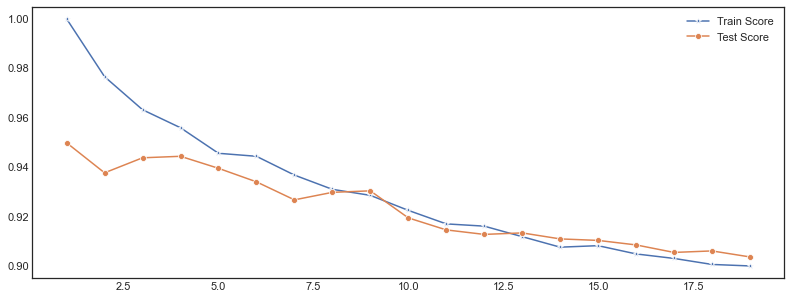

In [209]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

- The best result is captured at k = 1 hence 1 is used for the final model

In [210]:
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9495747266099636

In [211]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  1.0  2.0  3.0   All
True                          
1.0        513   33    3   549
2.0         25  512   12   549
3.0          3    7  538   548
All        541  552  553  1646

In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.93      0.94       549
         2.0       0.93      0.93      0.93       549
         3.0       0.97      0.98      0.98       548

    accuracy                           0.95      1646
   macro avg       0.95      0.95      0.95      1646
weighted avg       0.95      0.95      0.95      1646



In [213]:
AllmetricsC(knn, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1097    0    0]
 [   1 1096    0]
 [   0    0 1098]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[513  33   3]
 [ 25 512  12]
 [  3   7 538]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.948244  0.934426  0.941284    549.0
2.0   0.927536  0.932605  0.930064    549.0
3.0   0.972875  0.981752  0.977293    548.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.937427   0.938451  0.937434  0.937465
test   0.949575   0.949552  0.949594  0.949547


Accuracy  Precision    Recall        f1
Train  0.937427   0.938451  0.937434  0.937465
test   0.949575   0.949552  0.949594  0.949547

In [214]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9516015898994622
Best Parameters: {'n_neighbors': 1}


## KNN actual X 

In [215]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(X_sm),
        columns=['baseline value', 'accelerations', 'uterine_contractions',
       'severe_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_mode',
       'histogram_mean', 'histogram_median'])

In [216]:
y = y_sm

In [217]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0,stratify=y)

In [218]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [219]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.96962332928311 % and k = [1]


In [220]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.78007290400971 % and k = [1]


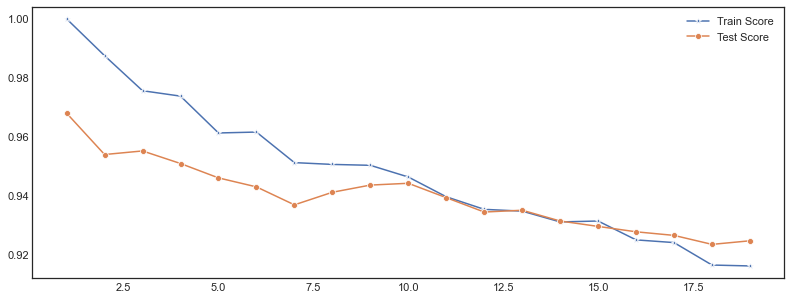

In [221]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

- The best result is captured at k = 1 hence 1 is used for the final model

In [222]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.9678007290400972

In [223]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn1.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  1.0  2.0  3.0   All
True                          
1.0        525   21    3   549
2.0         16  524    9   549
3.0          1    3  544   548
All        542  548  556  1646

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       549
         2.0       0.96      0.95      0.96       549
         3.0       0.98      0.99      0.99       548

    accuracy                           0.97      1646
   macro avg       0.97      0.97      0.97      1646
weighted avg       0.97      0.97      0.97      1646



In [225]:
AllmetricsC(knn1, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[1096    1    0]
 [   0 1097    0]
 [   0    0 1098]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[525  21   3]
 [ 16 524   9]
 [  1   3 544]]
 Classification report 
      precision    recall  f1-score  support
1.0   0.968635  0.956284  0.962420    549.0
2.0   0.956204  0.954463  0.955333    549.0
3.0   0.978417  0.992701  0.985507    548.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.958384   0.959368  0.958390  0.958434
test   0.967801   0.967752  0.967816  0.967753


Accuracy  Precision    Recall        f1
Train  0.958384   0.959368  0.958390  0.958434
test   0.967801   0.967752  0.967816  0.967753

In [226]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn1 = KNeighborsClassifier()
knn_cv1= GridSearchCV(knn,param_grid,cv=5)
knn_cv1.fit(X,y)

print("Best Score:" + str(knn_cv1.best_score_))
print("Best Parameters: " + str(knn_cv1.best_params_))

Best Score:0.967600055785946
Best Parameters: {'n_neighbors': 1}


# To conclude... 

- We can see that in both cases the ML model that best performs is the Random Forest Classification. Also we can say without any risk that balance the data improve our metrics in all the models. 

The top 3 models that best perform are: 

    - RF with balanced data (smote) and actual X; 
            f1 0.97; Acc 0.97
    - KNN with balanced data (smote) and actual X; 
            f1 0.96; Acc 0.97
    - KNN with balanced data (smote) and PCA X; 
            f1 0.96; Acc 0.95